In [ ]:
1. DATA PREPARATION

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Copy of heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [ ]:
EDA AND DATA PREPROCESSING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
df.describe()   ## Check for outliers

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
 df.describe() #summary_stats

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.dtypes #check the datatypes

,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,bool
restecg,object
thalch,int64
exang,object
oldpeak,float64


In [ ]:
missing_values = df.isna().sum()  #df.isnull()   # Check for missing values
missing_values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

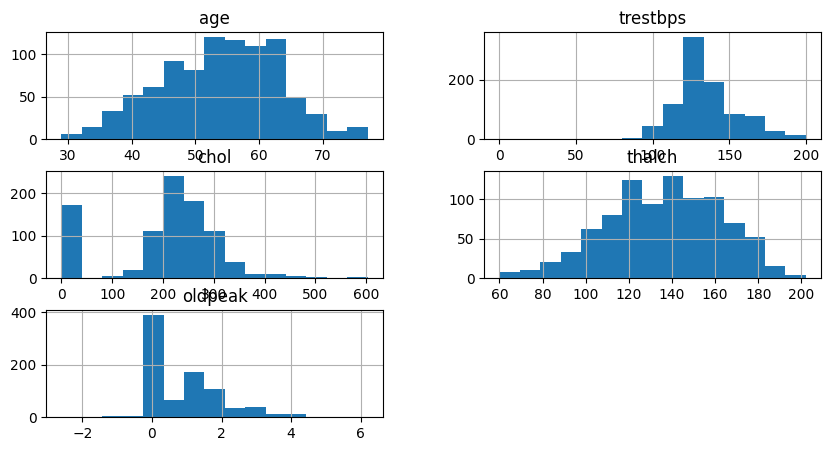

In [ ]:
# Histograms for numeric features.
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numeric_features].hist(figsize = (10,5), bins = 15, )


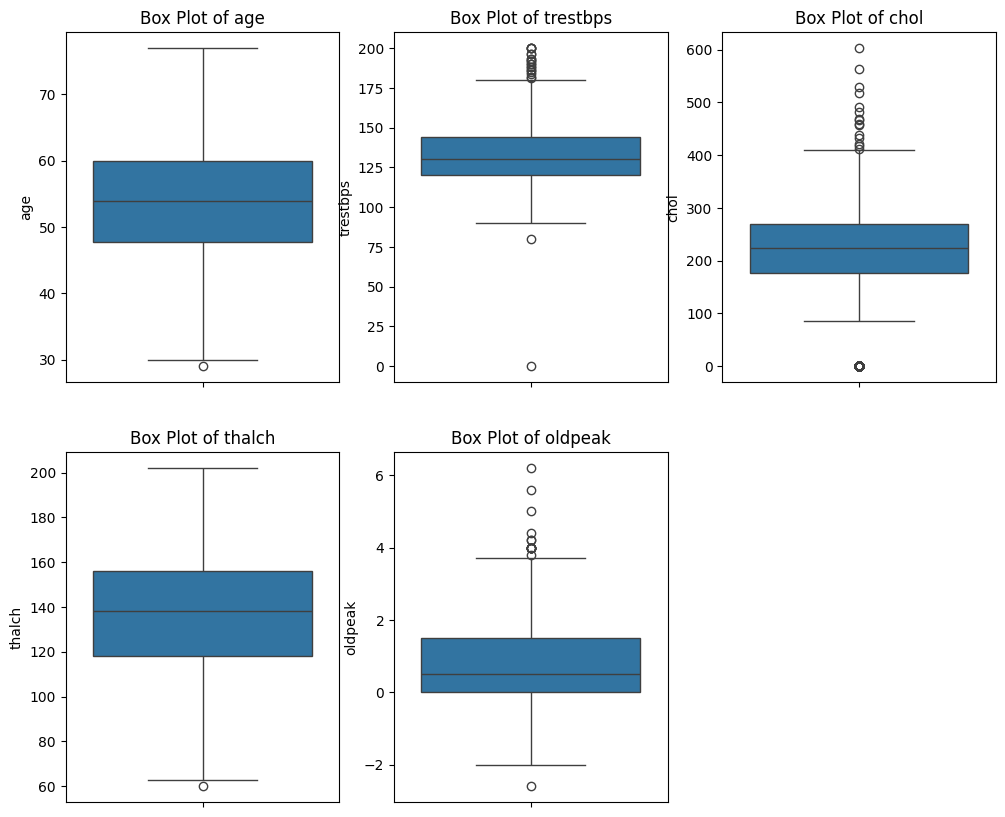

In [ ]:
 # Box Plot.
plt.figure(figsize = (12,10))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')

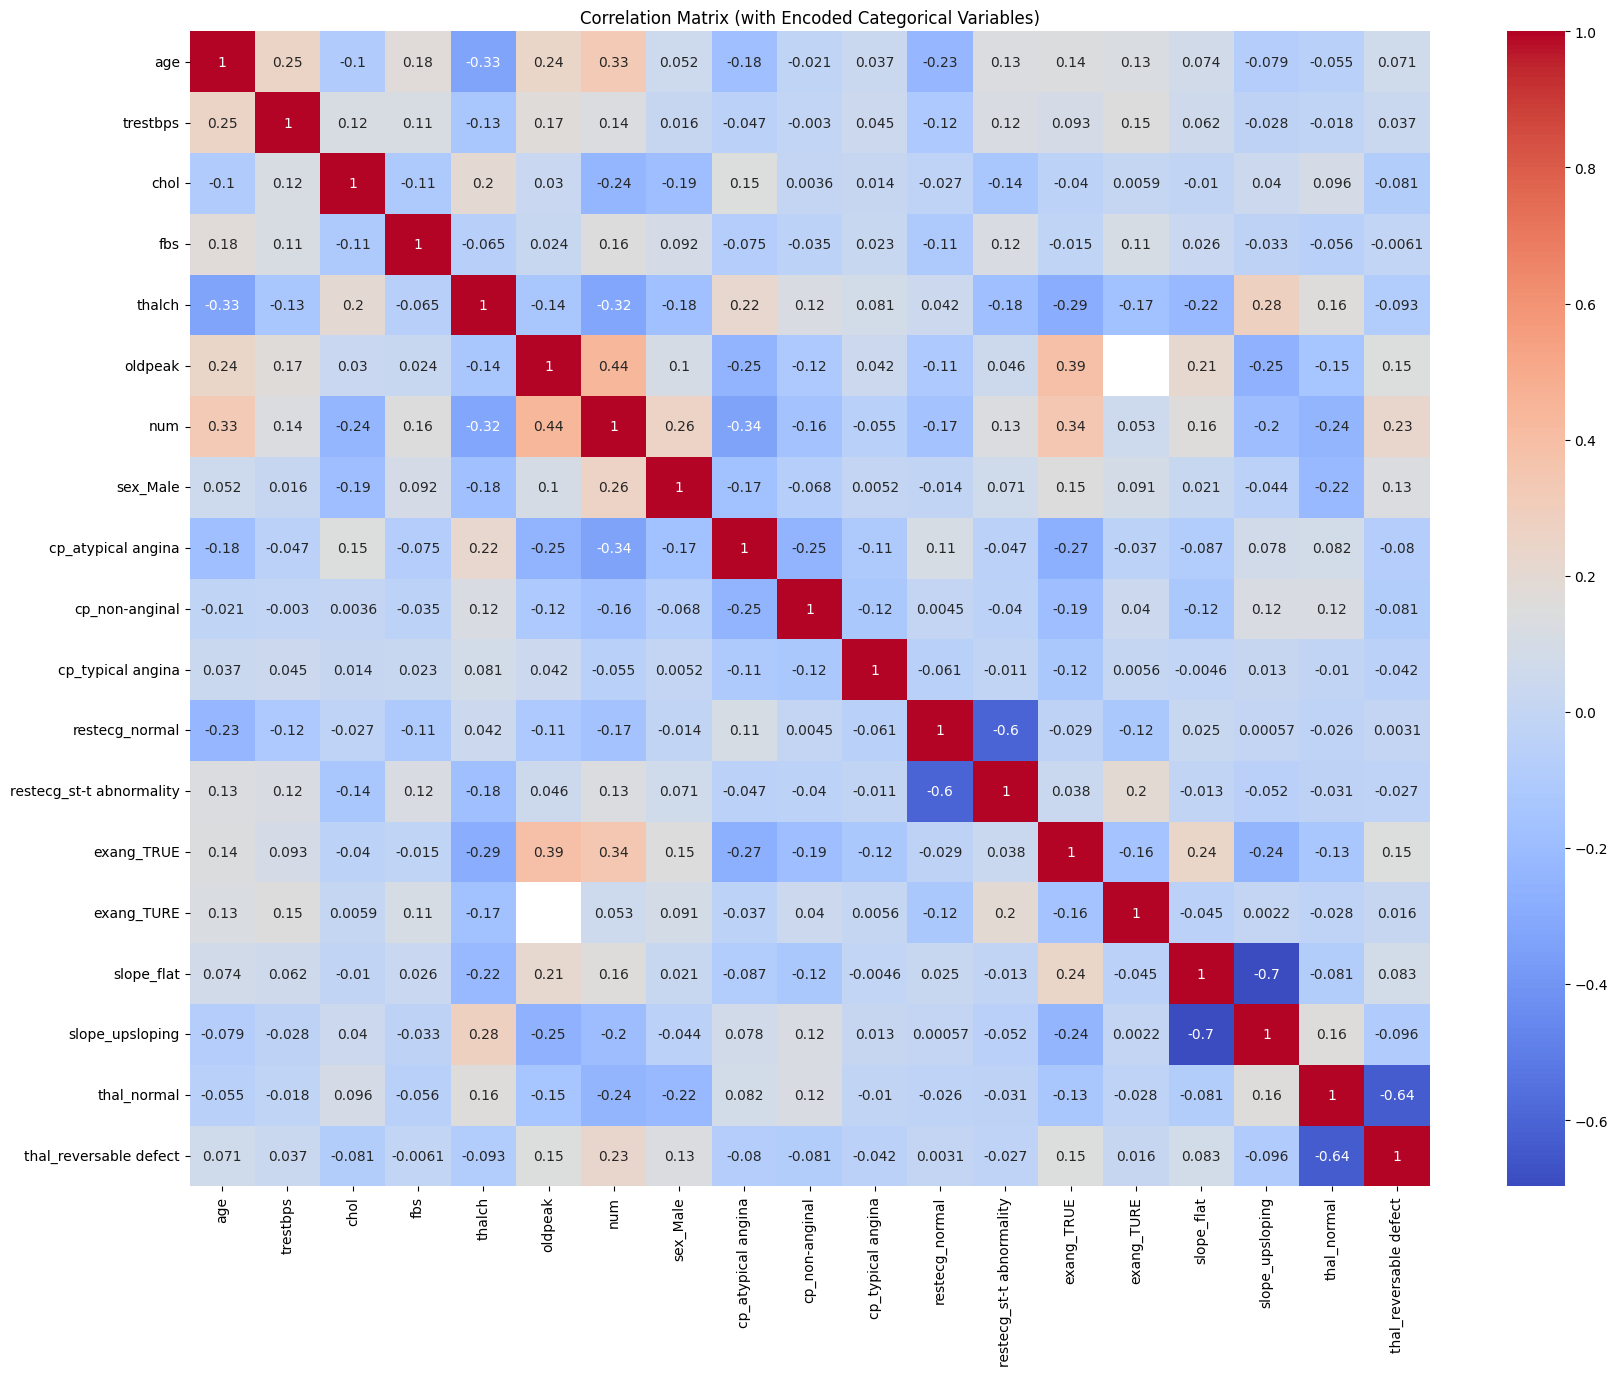

In [ ]:
# Correlation matrix
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

correlation_matrix_encoded = df_encoded.corr() #This line was accidentally commented out

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (with Encoded Categorical Variables)')
plt.show()

In [ ]:
3.FEATURE ENGNERRING AND FEATURE SELECTION

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [ ]:
# Encode categorical variables using one-hot encoding.

df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], drop_first=True)

In [ ]:
df.select_dtypes(include=['int']).columns

Index(['age', 'trestbps', 'chol', 'thalch', 'num'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'num']
scaler = StandardScaler()   # Initialize the scaler
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])    # Scaling numerical features

In [ ]:
 # Handing Missing Values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace = True)  # Fill missing values in the 'oldpeak' column with the median

In [ ]:
DECISION TREE CLASSIFICATION

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('num', axis=1)  # Features
y = df_encoded['num']               # Target variable

X = X.apply(lambda x: x.fillna(x.median()), axis=0)                                        # Check for missing values and fill with median
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split the dataset into training and testing sets


In [ ]:
df['num'] = df['num'].astype(int)     # target variable 'num' is treated as categorical

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming df_encoded is your DataFrame with encoded features and target variable 'num'

X = df_encoded.drop('num', axis=1)  # Features
y = df_encoded['num']               # Target variable

# Ensure 'num' is treated as categorical
y = y.astype(int)

X = X.apply(lambda x: x.fillna(x.median()), axis=0) # Check for missing values and fill with median
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the dataset

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)     # Train the model on the training
y_pred = clf.predict(X_test)  # Make predictions on the testing

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_auc_score   # Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

Accuracy: 0.80
Precision: 0.81
Recall: 0.80
F1-score: 0.80
ROC-AUC: 0.60


In [ ]:
HYPERPARAMETER TUNING AND MODEL EVALUATION

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {                                # Define the parameter grid
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30],
    'criterion': ['gini', 'entropy']
}

In [ ]:
clf = DecisionTreeClassifier(random_state=40)

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,cv=5, scoring='accuracy')#, n_jobs=-1)  #GridSearchCV with cross-validation
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best hyperparameter: {best_params}')

Best hyperparameter: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 30}


In [ ]:
best_clf = grid_search.best_estimator_

y_pred_best = best_clf.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy (Best Model): {accuracy_best:.2f}')
print(f'Precision (Best Model): {precision_best:.2f}')
print(f'Recall (Best Model): {recall_best:.2f}')
print(f'F1-score (Best Model): {f1_best:.2f}')
print(f'ROC-AUC (Best Model): {roc_auc_best:.2f}')


Accuracy (Best Model): 0.83
Precision (Best Model): 0.79
Recall (Best Model): 0.83
F1-score (Best Model): 0.81
ROC-AUC (Best Model): 0.59


In [ ]:
6.MODEL EVALUATION AND INTERPRETATION

In [ ]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')
roc_auc_best = roc_auc_score(y_test, best_clf.predict_proba(X_test), multi_class='ovr')

print(f'Accuracy (Best Model): {accuracy_best:.2f}')
print(f'Precision (Best Model): {precision_best:.2f}')
print(f'Recall (Best Model): {recall_best:.2f}')
print(f'F1-score (Best Model): {f1_best:.2f}')
print(f'ROC-AUC (Best Model): {roc_auc_best:.2f}')

Accuracy (Best Model): 0.83
Precision (Best Model): 0.79
Recall (Best Model): 0.83
F1-score (Best Model): 0.81
ROC-AUC (Best Model): 0.59


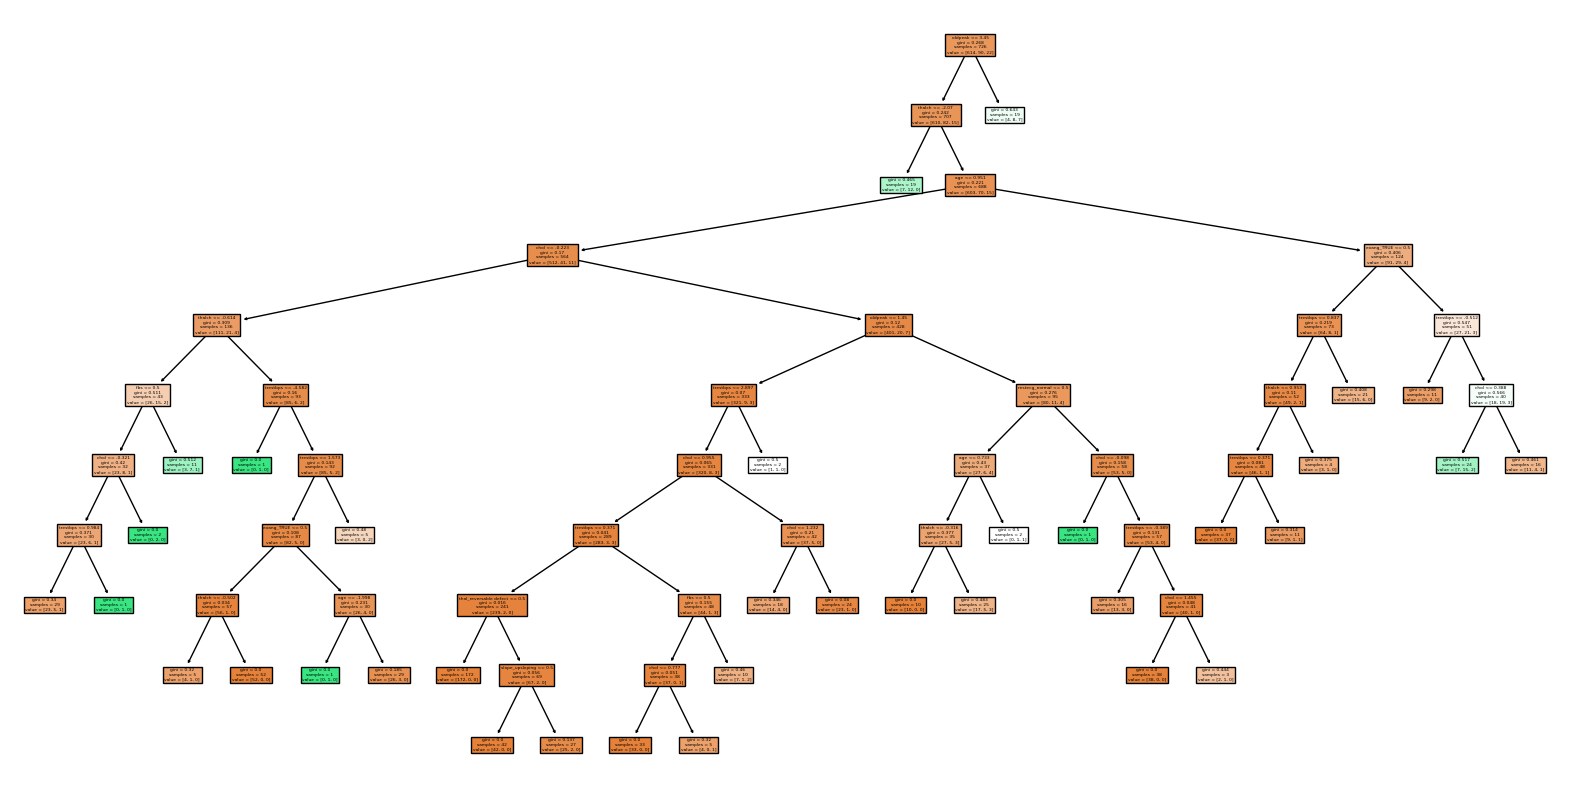

|--- oldpeak <= 3.45
|   |--- thalch <= -2.07
|   |   |--- class: 1
|   |--- thalch >  -2.07
|   |   |--- age <= 0.95
|   |   |   |--- chol <= -0.22
|   |   |   |   |--- thalch <= -0.61
|   |   |   |   |   |--- fbs <= 0.50
|   |   |   |   |   |   |--- chol <= -0.32
|   |   |   |   |   |   |   |--- trestbps <= 0.98
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- trestbps >  0.98
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- chol >  -0.32
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- fbs >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- thalch >  -0.61
|   |   |   |   |   |--- trestbps <= -4.58
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- trestbps >  -4.58
|   |   |   |   |   |   |--- trestbps <= 1.57
|   |   |   |   |   |   |   |--- exang_TRUE <= 0.50
|   |   |   |   |   |   |   |   |--- thalch <= -0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   

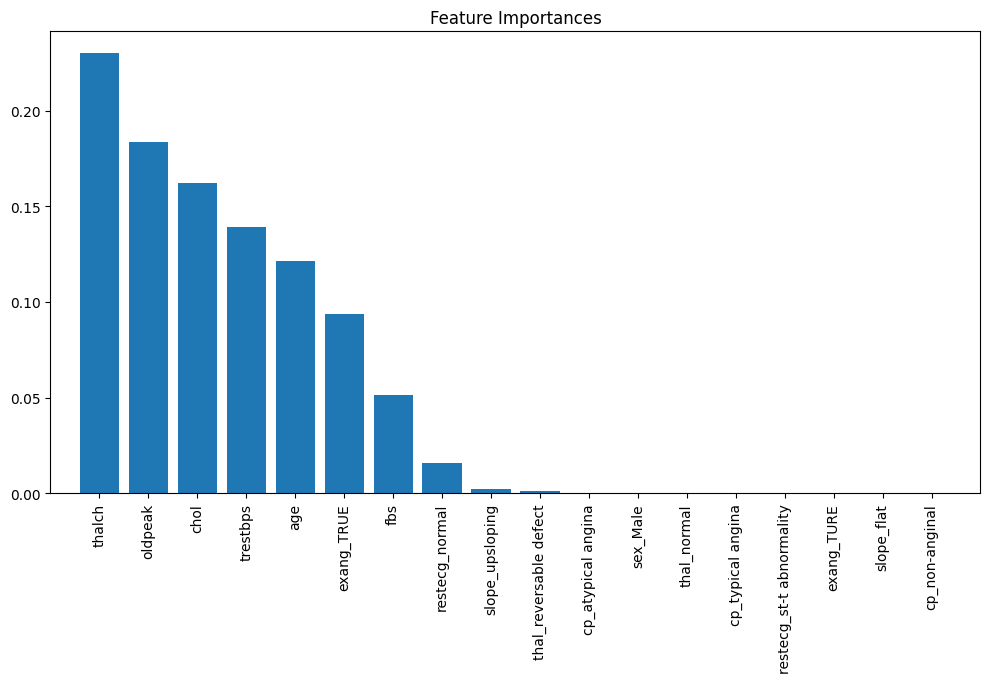

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(20,10))         # Visualize the decision tree
plot_tree(best_clf, feature_names=X.columns, filled=True)
plt.show()

tree_rules = export_text(best_clf, feature_names=list(X.columns))
print(tree_rules)                  # Print the decision rules

importances = best_clf.feature_importances_     # Bar Plot feature importances
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

## **Interview Questions:**
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Common hyperparameters of decision tree models include:

max_depth: Controls the tree's depth. Low values can cause underfitting, while high values may lead to overfitting.

min_samples_split: Minimum samples required to split a node. Higher values reduce overfitting, lower values increase complexity.

min_samples_leaf: Minimum samples per leaf. Higher values simplify the model, preventing overfitting.

max_features: Limits the number of features to consider for splits. Fewer features reduce overfitting, but may miss patterns.

criterion: Split quality metric (gini or entropy). Impacts how the tree decides splits but often has a minor effect on performance.

These hyperparameters balance model complexity and generalization, helping to control underfitting and overfitting.The hyperparameters of a decision tree affect performance by balancing complexity:

max_depth: Too shallow causes underfitting, too deep causes overfitting.

min_samples_split & min_samples_leaf: Higher values reduce overfitting by limiting splits and leaves, but too high can underfit.

max_features: Using fewer features reduces overfitting but may miss important patterns.

criterion: Impacts how splits are chosen but usually has a minor effect on overall performance.

These settings help manage the trade-off between accuracy and generalization.


2. What is the difference between the Label encoding and One-hot encoding?

The difference between Label Encoding and One-Hot Encoding lies in how they convert categorical data into numerical form:

Label Encoding: Each category is assigned a unique integer value (e.g., "cat" = 0, "dog" = 1, "mouse" = 2). It’s simple but may introduce a false sense of order between categories, which can confuse models.

One-Hot Encoding: Creates a binary column for each category. For example, for the categories "cat," "dog," and "mouse," three columns would be created with a 1 or 0 indicating the presence of a category (e.g., "cat" = [1, 0, 0], "dog" = [0, 1, 0]). It avoids ordinal relationships but can increase the dataset's dimensionality.